**research project1:**

Investigate the specific relationship between non-English speaking, and educational attainment, employment within the context of Los Angeles County:
This project researches how non-English speaking impact social equity,  which addresses these disparities to inform strategies  and promote pathways to equality of education and employment.  



**Do limited English households face challenges in accessing educational levels and employment?**

**do non-english speaking households have spatial autocorrelation within the regions?**


**Examine non-english language spatial variation.**

**objective:** analysisng the spatial distribution and variation of non-english households across different regions.

**Approach:** utilizing ANOVA analysis to invetigate spatial variation of non-english speaking households.

**Investigate Non-English Language Household Spatial Autocorrelation**

**Objective:** Explore the spatial relationships or clustering tendencies among non-English speaking households.

**`Approach:`** Operating Moran's I to asscess the spatial autocorrelation of non-english speaking households.


**Explore language-education-employement correlation**

**Objective:** Understanding the relationship between the language spoken(english limit), education attatinment, and employment.

**Approach:** Develop OLS and Spatial Weight Regression to investigate correlation among with non-english languages, educations levels, and employment rate

#setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas shapely fiona pyproj rtree contextily mapclassify pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 36.5 MB

In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import box
import geopandas as gpd
import fiona
import pingouin as pg
import seaborn as sns
from scipy import stats
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran

In [ ]:
from libpysal.weights.contiguity import Rook
import splot
from esda.moran import Moran

#english proficiency



##data processing


Count and percent of households with limited English, ACS 2020 5-Yr
https://data.lacounty.gov/datasets/lacounty::limited-english-households-census-tract/about

In [ ]:
limited_english =gpd.read_file("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/Limited_English_Households_(census_tract).shp")

In [ ]:
limited_english.head() #limited_english_pct

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


tract data: the American Community Survey (ACS) s1602(limitd english speaks household 2022-5yr)

In [ ]:
limit_eng =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/limit_eng_5Y_2022.S1602-Data copy.csv")

In [ ]:
deleted_chars = 9 #define number of charter delete

In [ ]:
limit_eng['GEO_ID'] = limit_eng['GEO_ID'].str[deleted_chars:]

In [ ]:
limit_eng.head()

,GEO_ID,NAME,S1602_C01_001E,S1602_C01_001M,S1602_C01_002E,S1602_C01_002M,S1602_C01_003E,S1602_C01_003M,S1602_C01_004E,S1602_C01_004M,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,130,333,121,542,129,141,53,...,6.4,15.0,14.4,30.3,13.7,17.7,14.7,0.0,91.2,NaN
1,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,160,128,65,485,159,152,49,...,6.9,0.0,26.3,24.7,18.5,0.0,22.9,-,**,NaN
2,06037101220,Census Tract 1012.20; Los Angeles County; Cali...,1349,208,391,148,305,76,205,160,...,5.2,1.3,2.4,56.7,15.4,12.2,12.5,0.0,54.8,NaN
3,06037101221,Census Tract 1012.21; Los Angeles County; Cali...,1424,293,361,107,489,237,112,77,...,14.6,29.1,19.3,55.2,28.5,0.0,29.2,100.0,41.5,NaN
4,06037101222,Census Tract 1012.22; Los Angeles County; Cali...,928,146,294,130,447,150,55,53,...,13.5,4.8,8.0,55.5,21.4,0.0,44.4,0.0,84.9,NaN


In [ ]:
limit_eng.shape

(2498, 43)

merge data

In [ ]:
merge_lim_eng = pd.merge(limited_english, limit_eng, left_on='tract', right_on='GEO_ID', how='left')

In [ ]:
merge_lim_eng.head()

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,...,5.7,20.8,10.7,0.0,79.8,28.3,17.2,-,**,NaN
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,...,10.1,16.5,12.9,-,**,40.5,18.7,-,**,NaN
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,...,10.4,23.6,17.6,0.0,65.8,41.9,18.8,-,**,NaN
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,...,11.5,31.8,14.9,0.0,63.3,66.7,25.2,-,**,NaN
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,...,4.8,6.3,6.2,0.0,100.0,41.7,32.3,-,**,NaN


In [ ]:
merge_lim_eng = merge_lim_eng.replace(['-', '**'], 0)


In [ ]:
merge_lim_eng.head()

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,...,5.7,20.8,10.7,0.0,79.8,28.3,17.2,0,0,NaN
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,...,10.1,16.5,12.9,0,0,40.5,18.7,0,0,NaN
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,...,10.4,23.6,17.6,0.0,65.8,41.9,18.8,0,0,NaN
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,...,11.5,31.8,14.9,0.0,63.3,66.7,25.2,0,0,NaN
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,...,4.8,6.3,6.2,0.0,100.0,41.7,32.3,0,0,NaN


###plot

<Axes: >

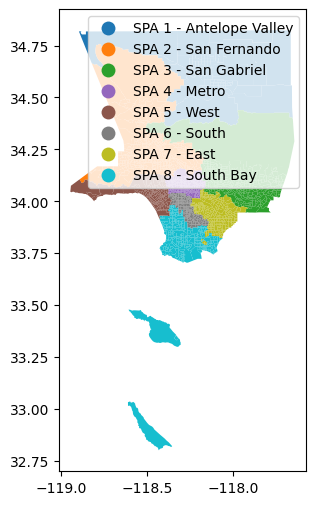

In [ ]:
merge_lim_eng.plot(column = 'spa',legend=True, figsize=(16,6))


<Axes: >

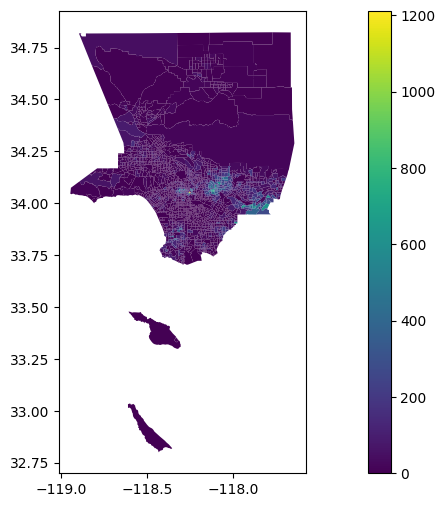

In [ ]:
merge_lim_eng.plot(column = 'S1602_C03_004E',legend=True, figsize=(16,6))


##1601

In [ ]:
lim_eng_1601 =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/ACSST5Y2022.S1601_2024-01-16T024156/ACSST5Y2022.S1601-Data.revise 2 2.csv")

In [ ]:
deleted_chars = 9

In [ ]:
lim_eng_1601['GEO_ID'] = lim_eng_1601['GEO_ID'].str[deleted_chars:]

In [ ]:
lim_eng_1601.head()

,GEO_ID,NAME,S1601_C01_001E,S1601_C01_001M,S1601_C01_002E,S1601_C01_002M,S1601_C01_003E,S1601_C01_003M,S1601_C01_004E,S1601_C01_004M,...,S1601_C06_020M,S1601_C06_021E,S1601_C06_021M,S1601_C06_022E,S1601_C06_022M,S1601_C06_023E,S1601_C06_023M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,06001400100,Census Tract 4001; Alameda County; California,3136,448,2449,438,687,206,142,84,...,1.8,(X),(X),11.5,8.9,10.9,14.5,11.7,11.1,NaN
1,06001400200,Census Tract 4002; Alameda County; California,1978,199,1670,254,308,131,69,86,...,1.6,(X),(X),11.8,11.0,21.4,33.3,9.0,9.5,NaN
2,06001400300,Census Tract 4003; Alameda County; California,5492,574,4623,491,869,353,207,259,...,1.8,(X),(X),16.9,12.6,0.0,31.5,20.3,14.6,NaN
3,06001400400,Census Tract 4004; Alameda County; California,3956,474,3463,470,493,146,232,119,...,0.9,(X),(X),11.3,8.1,25.3,21.4,6.5,6.8,NaN
4,06001400500,Census Tract 4005; Alameda County; California,3791,737,2991,738,800,251,261,97,...,2.0,(X),(X),11.3,11.8,0.0,17.5,17.9,19.2,NaN


In [ ]:
lim_eng_1601.shape

(9129, 291)



##Estimate!!Limited English-speaking households!!All households

S1602_C04_001E

In [ ]:
merge_lim_eng['S1602_C04_001E'] = merge_lim_eng['S1602_C04_001E'].astype(float)
#convert dtypes

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C04_001E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,6.094624,4.467962,93
SPA 2 - San Fernando,11.523477,9.309795,558
SPA 3 - San Gabriel,14.925765,9.980253,392
SPA 4 - Metro,18.535227,13.557807,352
SPA 5 - West,4.582162,4.420672,185
SPA 6 - South,15.956735,9.936462,245
SPA 7 - East,13.672759,9.516421,290
SPA 8 - South Bay,9.132895,8.752040,380


In [ ]:
eng_lim_region = merge_lim_eng.groupby('spa')['S1602_C04_001E'].mean().reset_index()
eng_lim_region_join = pd.merge(limited_english, eng_lim_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'Percent limited English-speaking households!!All household')

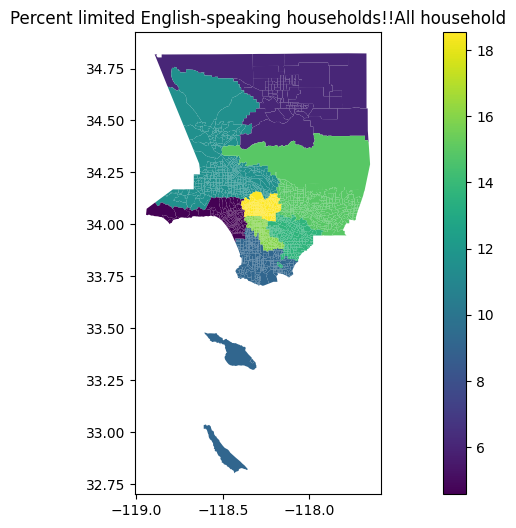

In [ ]:
eng_lim_region_join.plot(column = 'S1602_C04_001E',legend=True, figsize=(16,6)).set_title('Percent limited English-speaking households!!All household')

In [ ]:
aov = pg.anova(dv='S1602_C04_001E', between='spa', data=merge_lim_eng,
               detailed=True)

#Estimate!!Percent limited English-speaking households!!All households

aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,38651.224672,7,5521.603525,58.072382,2.150329e-77,0.140489
1,Within,236467.448851,2487,95.081403,NaN,NaN,NaN


the p-val is small than significant level, thus we can reject the null hypothesis.
the Limited English-speaking households is large different between greater SPA regions


The F ratio is higher than 1.0, so the variation among group means is more than you'd expect to see by chance, and the null hypothesis is false.

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_001E'].agg(['mean', 'std', 'size'])##Estimate!!Limited English-speaking households!!All households

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,84.774194,71.148212,93
SPA 2 - San Fernando,154.433692,144.269403,558
SPA 3 - San Gabriel,201.025510,145.112460,392
SPA 4 - Metro,232.210227,185.515532,352
SPA 5 - West,72.956757,76.521511,185
SPA 6 - South,173.755102,111.526651,245
SPA 7 - East,164.434483,117.097234,290
SPA 8 - South Bay,122.371053,102.024167,380


In [ ]:
aov = pg.anova(dv='S1602_C03_001E', between='spa', data=merge_lim_eng,
               detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,5.017748e+06,7,716821.137348,40.158459,8.110176e-54,0.101553
1,Within,4.439249e+07,2487,17849.816803,NaN,NaN,NaN


<Axes: >

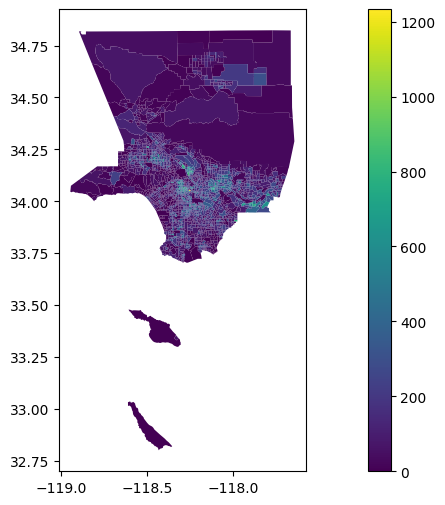

In [ ]:
merge_lim_eng.plot(column = 'S1602_C03_001E',legend=True, figsize=(16,6))
#Estimate!!Limited English-speaking households!!All households

####gobal moran

Estimate!!Limited English-speaking households!!All households

In [ ]:
y_lim = merge_lim_eng['S1602_C04_001E'].values
w_lim = Rook.from_dataframe(merge_lim_eng)

<ipython-input-24-ded3f4e19e14>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
w_lim.transform = 'r'

In [ ]:
moran_lim = Moran(y_lim, w_lim)
print("Moran's I:", moran_lim.I)
print("Moran's p-val:", moran_lim.p_sim)

Moran's I: 0.5902508600716286
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


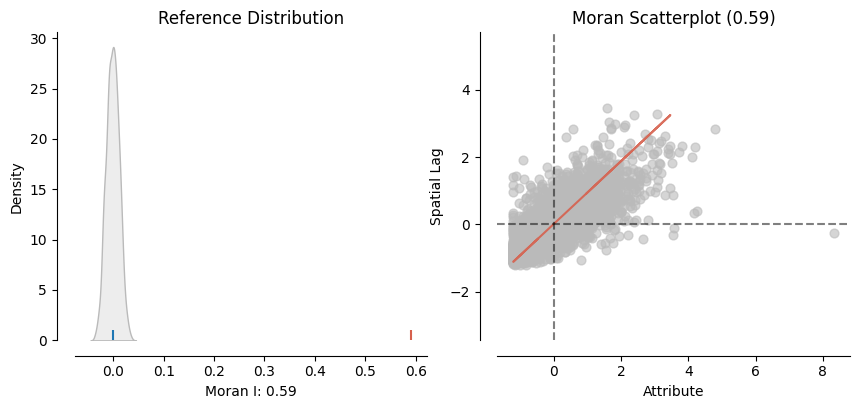

In [ ]:
plot_moran(moran_lim, zstandard=True, figsize=(10,4))
plt.show()

In [ ]:
moran_loc_lim = Moran_Local(y_lim, w_lim)

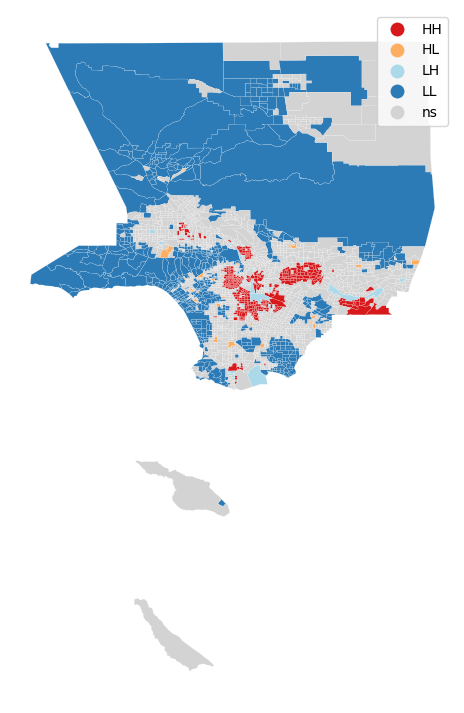

In [ ]:
lisa_cluster(moran_loc_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

##Estimate!Households speaking --!!Spanish

In [ ]:
merge_lim_eng['S1602_C02_002E'] = merge_lim_eng['S1602_C02_002E'].astype(float)
#Estimate!!Percent!!All households!!Households speaking --!!Spanish

In [ ]:
merge_lim_eng['S1602_C04_002E'] = merge_lim_eng['S1602_C04_002E'].astype(float)
#Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C02_002E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,33.340860,18.080937,93
SPA 2 - San Fernando,32.478136,25.223256,558
SPA 3 - San Gabriel,34.479337,21.537582,392
SPA 4 - Metro,36.988636,25.231883,352
SPA 5 - West,11.837297,9.024662,185
SPA 6 - South,61.093878,22.465177,245
SPA 7 - East,62.786552,27.048511,290
SPA 8 - South Bay,31.671316,23.003958,380


In [ ]:
span_region = merge_lim_eng.groupby('spa')['S1602_C02_002E'].mean().reset_index()
span_region_join = pd.merge(limited_english , span_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'Percent!!All households!!Households speaking --!!Spanish')

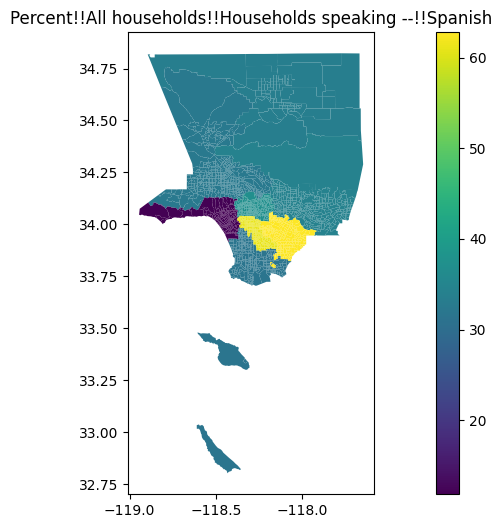

In [ ]:
span_region_join.plot(column = 'S1602_C02_002E',legend=True, figsize=(16,6)).set_title('Percent!!All households!!Households speaking --!!Spanish')


In [ ]:
aov = pg.anova(dv='S1602_C02_002E', between='spa', data=merge_lim_eng,
               detailed=True)#Households speaking --!!Spanish
aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,4.748858e+05,7,67840.823985,125.965991,7.537431e-159,0.261747
1,Within,1.339410e+06,2487,538.564601,NaN,NaN,NaN


In [ ]:
merge_lim_eng.groupby('spa')['S1602_C04_002E'].mean().reset_index()
#Estimate!!Limited English-speaking households!!All households

,spa,S1602_C04_002E
0,SPA 1 - Antelope Valley,12.691398
1,SPA 2 - San Fernando,14.016308
2,SPA 3 - San Gabriel,10.748214
3,SPA 4 - Metro,24.471023
4,SPA 5 - West,7.927027
5,SPA 6 - South,22.581633
6,SPA 7 - East,14.648276
7,SPA 8 - South Bay,13.403684


In [ ]:
aov = pg.anova(dv='S1602_C04_002E', between='spa', data=merge_lim_eng,
               detailed=True)

#Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish
aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,63816.822432,7,9116.688919,53.877741,5.899508e-72,0.131678
1,Within,420826.949087,2487,169.210675,NaN,NaN,NaN


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Spanish

In [ ]:
y_lim_span = merge_lim_eng['S1602_C04_002E'].values
w_lim_span = Rook.from_dataframe(merge_lim_eng)
w_lim_span.transform = 'r'

<ipython-input-38-5c09f27e480f>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lim_span = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_lim_span = Moran(y_lim_span, w_lim_span)
print("Moran's I:", moran_lim_span.I)
print("Moran's p-val:", moran_lim_span.p_sim)

Moran's I: 0.38620441661358673
Moran's p-val: 0.001


In [ ]:
moran_loc_lim_span = Moran_Local(y_lim_span, w_lim_span)

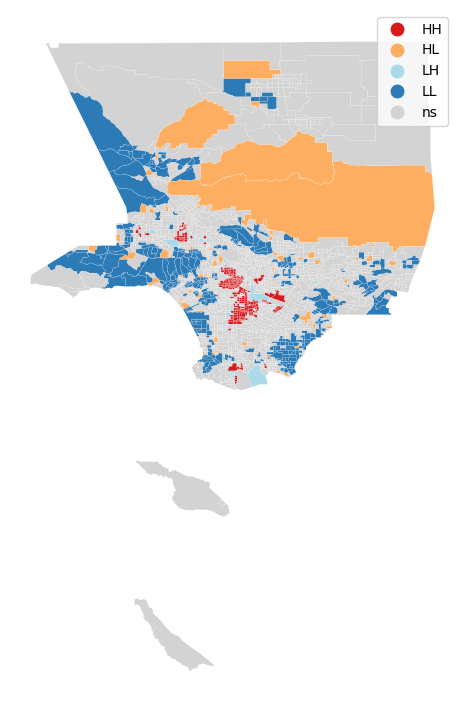

In [ ]:
lisa_cluster(moran_loc_lim_span, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish

In [ ]:
y_span = merge_lim_eng['S1602_C02_002E'].values
w_span = Rook.from_dataframe(merge_lim_eng)
w_span.transform = 'r'

<ipython-input-42-1328705c8b66>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_span = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_span = Moran(y_span, w_span)
print("Moran's I:", moran_span.I)
print("Moran's p-val:", moran_span.p_sim)

Moran's I: 0.8112699387055071
Moran's p-val: 0.001


In [ ]:
moran_loc_span = Moran_Local(y_span, w_span)

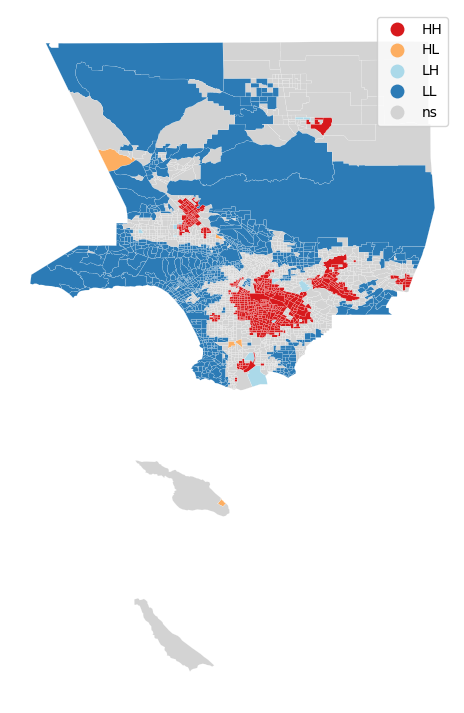

In [ ]:
lisa_cluster(moran_loc_span, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

##Estimate!!Households speaking --!!Other Indo-European languages

In [ ]:
merge_lim_eng['S1602_C02_003E'] = merge_lim_eng['S1602_C02_003E'].astype(float)
merge_lim_eng['S1602_C04_003E'] = merge_lim_eng['S1602_C04_003E'].astype(float)


In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_003E'].agg(['mean', 'std', 'size'])
#limit english of precentage


,mean,std,size
spa,,,
SPA 1 - Antelope Valley,5.946237,13.872373,93
SPA 2 - San Fernando,58.039427,103.957189,558
SPA 3 - San Gabriel,5.168367,17.688906,392
SPA 4 - Metro,23.119318,55.287876,352
SPA 5 - West,28.637838,48.497240,185
SPA 6 - South,1.526531,6.990942,245
SPA 7 - East,3.413793,11.015928,290
SPA 8 - South Bay,7.315789,15.170283,380


In [ ]:
eur_region = merge_lim_eng.groupby('spa')['S1602_C02_003E'].mean().reset_index()
eur_region.head()

,spa,S1602_C02_003E
0,SPA 1 - Antelope Valley,2.252688
1,SPA 2 - San Fernando,14.471864
2,SPA 3 - San Gabriel,2.954592
3,SPA 4 - Metro,6.230966
4,SPA 5 - West,12.666486


In [ ]:
eur_region_join = pd.merge(limited_english , eur_region, left_on='spa', right_on='spa', how='left')


In [ ]:
aov = pg.anova(dv='S1602_C04_003E', between='spa', data=merge_lim_eng,
               detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,6.624582e+04,7,9463.687967,20.464304,6.737719e-27,0.054463
1,Within,1.150110e+06,2487,462.448560,NaN,NaN,NaN


In [ ]:
aov = pg.anova(dv='S1602_C04_003E', between='csa', data=merge_lim_eng,
               detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,csa,293676.790102,298,985.492584,2.345499,7.947851e-28,0.24144
1,Within,922678.594828,2196,420.163295,NaN,NaN,NaN


In [ ]:
merge_lim_eng.groupby('sup_dist')['S1602_C03_003E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
sup_dist,,,
District 1,6.344064,26.913772,497
District 2,4.515810,12.949282,506
District 3,42.675045,65.353028,557
District 4,5.907598,14.330522,487
District 5,45.669643,107.259195,448


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Other Indo-European languages

In [ ]:
y_eur = merge_lim_eng['S1602_C02_003E'].values
w_eur = Rook.from_dataframe(merge_lim_eng)
w_eur.transform = 'r'

<ipython-input-59-98b8ac22aaa7>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_eur = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_eur = Moran(y_eur, w_eur)
print("Moran's I:", moran_eur.I)
print("Moran's p-val:", moran_eur.p_sim)

In [ ]:
moran_loc_eur = Moran_Local(y_eur, w_eur)
lisa_cluster(moran_loc_eur, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Other Indo-European languages

In [ ]:
y_eur_lim = merge_lim_eng['S1602_C04_003E'].values
w_eur_lim = Rook.from_dataframe(merge_lim_eng)
w_eur_lim.transform = 'r'

In [ ]:
moran_eur_lim = Moran(y_eur_lim, w_eur_lim)
print("Moran's I:", moran_eur_lim.I)
print("Moran's p-val:", moran_eur_lim.p_sim)

In [ ]:
moran_loc_eur_lim = Moran_Local(y_eur_lim, w_eur_lim)
lisa_cluster(moran_loc_eur_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

##Estimate!!Percent!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
merge_lim_eng['S1602_C02_004E'] = merge_lim_eng['S1602_C02_004E'].astype(float)
merge_lim_eng['S1602_C04_004E'] = merge_lim_eng['S1602_C04_004E'].astype(float)

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C02_004E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,3.343011,3.162119,93
SPA 2 - San Fernando,8.334229,7.163587,558
SPA 3 - San Gabriel,28.449490,20.847290,392
SPA 4 - Metro,14.965341,13.705163,352
SPA 5 - West,8.332432,6.675029,185
SPA 6 - South,2.686531,5.672188,245
SPA 7 - East,8.298276,11.655598,290
SPA 8 - South Bay,11.858684,11.062957,380


In [ ]:
asian_region = merge_lim_eng.groupby('spa')['S1602_C02_004E'].mean().reset_index()
asian_region_join = pd.merge(limited_english , asian_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'Percent!!All households!!Households speaking --!!Asian and Pacific Island languages')

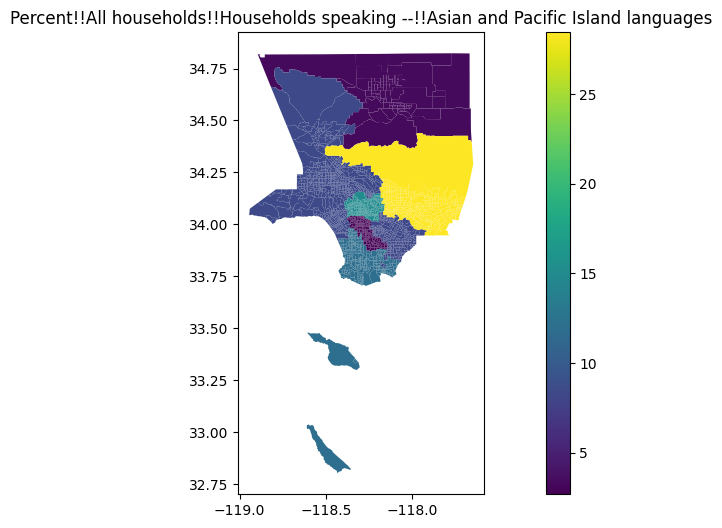

In [ ]:
asian_region_join.plot(column = 'S1602_C02_004E',legend=True, figsize=(16,6)).set_title('Percent!!All households!!Households speaking --!!Asian and Pacific Island languages')


In [ ]:
aov = pg.anova(dv='S1602_C02_004E', between='spa', data=merge_lim_eng,
               detailed=True)#limited_english_pct

aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,151231.239311,7,21604.462759,146.38004,3.625793e-181,0.291788
1,Within,367060.282669,2487,147.591589,NaN,NaN,NaN


In [ ]:
aov = pg.anova(dv='S1602_C03_004E', between='sup_dist', data=merge_lim_eng,
               detailed=True)#limited_english_pct

aov

,Source,SS,DF,MS,F,p-unc,np2
0,sup_dist,2.931350e+06,4,732837.409074,96.945413,9.299450e-77,0.13475
1,Within,1.882260e+07,2490,7559.278868,NaN,NaN,NaN


In [ ]:
aov = pg.anova(dv='S1602_C04_004E', between='csa', data=merge_lim_eng,
               detailed=True)
#Estimate!!Percent limited English-speaking households!!
#All households!!Households speaking --!!Asian and Pacific Island languages

aov

,Source,SS,DF,MS,F,p-unc,np2
0,csa,3.731832e+05,298,1252.292566,2.45994,4.078675e-31,0.250272
1,Within,1.117927e+06,2196,509.074349,NaN,NaN,NaN


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
y_asian = merge_lim_eng['S1602_C02_004E'].values
w_asian = Rook.from_dataframe(merge_lim_eng)
w_asian.transform = 'r'

<ipython-input-73-09cb60b71315>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_asian = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_asian = Moran(y_asian, w_asian)
print("Moran's I:", moran_asian.I)
print("Moran's p-val:", moran_asian.p_sim)

Moran's I: 0.7476216539386997
Moran's p-val: 0.001


In [ ]:
moran_loc_asian = Moran_Local(y_asian, w_asian)

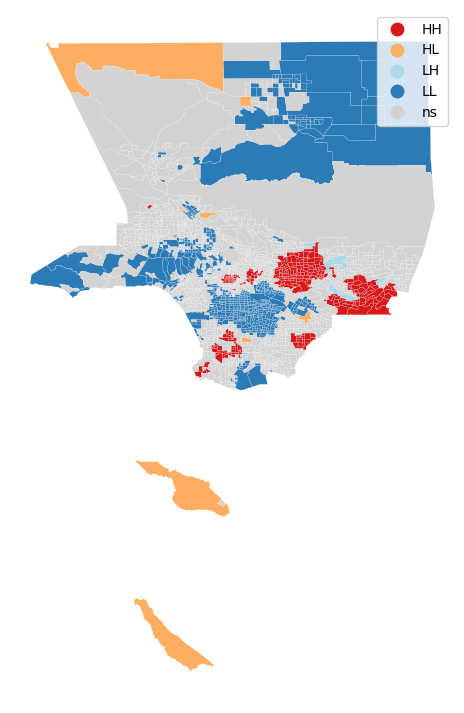

In [ ]:
lisa_cluster(moran_loc_asian, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
y_asian_lim = merge_lim_eng['S1602_C04_004E'].values
w_asian_lim = Rook.from_dataframe(merge_lim_eng)
w_asian_lim.transform = 'r'

<ipython-input-77-ae1f13449e35>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_asian_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_asian_lim = Moran(y_asian_lim, w_asian_lim)
print("Moran's I:", moran_asian_lim.I)
print("Moran's p-val:", moran_asian_lim.p_sim)

Moran's I: 0.1564769970971195
Moran's p-val: 0.001


##-!!Other languages

In [ ]:
merge_lim_eng['S1602_C04_005E'] = merge_lim_eng['S1602_C04_005E'].astype(float)
merge_lim_eng['S1602_C02_005E'] = merge_lim_eng['S1602_C02_005E'].astype(float)

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_005E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,2.086022,8.717369,93
SPA 2 - San Fernando,5.204301,17.137563,558
SPA 3 - San Gabriel,1.770408,7.024134,392
SPA 4 - Metro,3.485795,12.478806,352
SPA 5 - West,2.918919,9.807324,185
SPA 6 - South,2.200000,8.054934,245
SPA 7 - East,1.182759,4.940236,290
SPA 8 - South Bay,2.613158,9.660208,380


In [ ]:
aov = pg.anova(dv='S1602_C03_005E', between='spa', data=merge_lim_eng,
               detailed=True)#limited_english_pct

aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,4636.238510,7,662.319787,5.139761,0.000008,0.01426
1,Within,320479.719005,2487,128.861970,NaN,NaN,NaN


In [ ]:
aov = pg.anova(dv='S1602_C03_005E', between='csa', data=merge_lim_eng,
               detailed=True)#limited_english_pct

aov

,Source,SS,DF,MS,F,p-unc,np2
0,csa,50318.308502,298,168.853384,1.349364,0.000168,0.15477
1,Within,274797.649013,2196,125.135541,NaN,NaN,NaN


###gobal moran

In [ ]:
y_other = merge_lim_eng['S1602_C02_005E'].values
w_other = Rook.from_dataframe(merge_lim_eng)
w_other.transform = 'r'

<ipython-input-64-3f402201b8f3>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_other = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [ ]:
moran_other = Moran(y_other, w_other)
print("Moran's I:", moran_other.I)
print("Moran's p-val:", moran_other.p_sim)

Moran's I: 0.29597518377375615
Moran's p-val: 0.001


#employment

https://geohub.lacity.org/datasets/lacounty::unemployment-census-tract/about

https://data.census.gov/map?q=Los%20Angeles%20County,%20California&g=050XX00US06037$1400000&tid=ACSST1Y2022.S2301&layer=VT_2022_140_00_PY_D1&mode=thematic&loc=33.9543,-117.9451,z8.1854
(S2301)

##data processing

In [ ]:
unemployment =gpd.read_file("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/Unemployment__census_tract_.shp")

In [ ]:
unemployment.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2..."
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2..."
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2..."
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2..."
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2..."


In [ ]:
labor =pd.read_csv("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/ACSST5Y2022.S2301_labor/ACSST5Y2022employment.csv")

In [ ]:
labor.shape

(2498, 283)

In [ ]:
deleted_chars = 9 #define number of charter delete

In [ ]:
labor['GEO_ID'] = labor['GEO_ID'].str[deleted_chars:]

merge data

In [ ]:
merge_labor = pd.merge(unemployment, labor, left_on='tract', right_on='GEO_ID', how='left')

In [ ]:
merge_labor = merge_labor.replace(['-', '**','NaN'], 0)


In [ ]:
merge_labor.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry,...,S2301_C04_031M,S2301_C04_032E,S2301_C04_032M,S2301_C04_033E,S2301_C04_033M,S2301_C04_034E,S2301_C04_034M,S2301_C04_035E,S2301_C04_035M,Unnamed: 282
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2...",...,3.2,25.8,28.5,0.0,10.4,8.0,5.7,3.4,4.2,NaN
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2...",...,4.3,8.6,19.1,0.0,14.7,4.3,6.1,12.2,9.1,NaN
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2...",...,5.0,0.0,11.2,13.3,13.2,24.0,13.0,3.3,3.8,NaN
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2...",...,3.3,11.1,17.1,0.0,25.1,4.5,5.8,0.0,6.8,NaN
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2...",...,11.8,0.0,23.2,4.3,7.6,19.3,23.1,24.9,30.8,NaN


##Estimate!!Total!!Population 20 to 64 years!!DISABILITY STATUS!!With any disability

S2301_C01_030E

In [ ]:
merge_labor.groupby('spa')['S2301_C01_030E'].agg(['mean', 'std', 'size'])

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,269.043011,156.970706,93
SPA 2 - San Fernando,183.978495,107.783110,558
SPA 3 - San Gabriel,191.747449,108.935867,392
SPA 4 - Metro,172.934659,125.386190,352
SPA 5 - West,107.745946,88.497146,185
SPA 6 - South,257.428571,116.959044,245
SPA 7 - East,195.293103,112.276939,290
SPA 8 - South Bay,205.373684,150.792934,380


<Axes: >

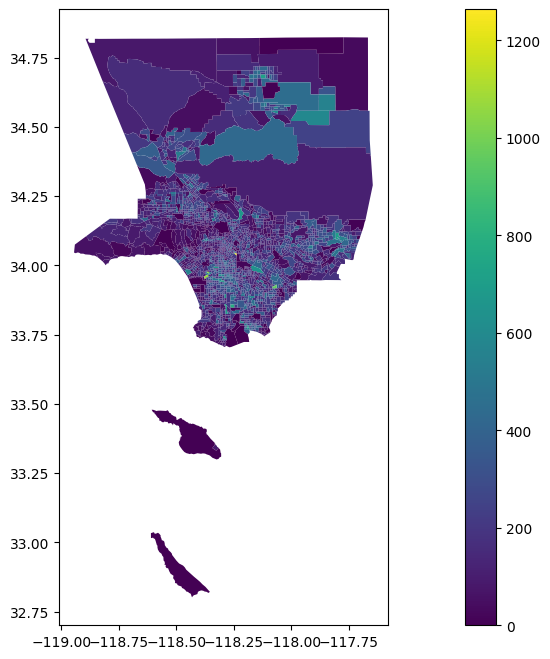

In [ ]:
merge_labor.plot(column = 'S2301_C01_030E',legend=True, figsize=(20,8))


##Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree

S2301_C01_034E

In [ ]:
merge_labor['S2301_C02_028E'] = merge_labor['S2301_C02_028E'].astype(float)
#Estimate!!Labor Force Participation Rate!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!Below poverty level

In [ ]:
merge_labor.groupby('spa')['S2301_C02_028E'].agg(['mean', 'std', 'size'])#S2301_C01_034E

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,36.343011,19.322140,93
SPA 2 - San Fernando,49.519355,21.518932,558
SPA 3 - San Gabriel,45.793622,19.512640,392
SPA 4 - Metro,51.355114,16.814509,352
SPA 5 - West,45.180000,24.028626,185
SPA 6 - South,46.238367,13.727303,245
SPA 7 - East,46.991034,18.836427,290
SPA 8 - South Bay,45.786579,21.525224,380


<Axes: >

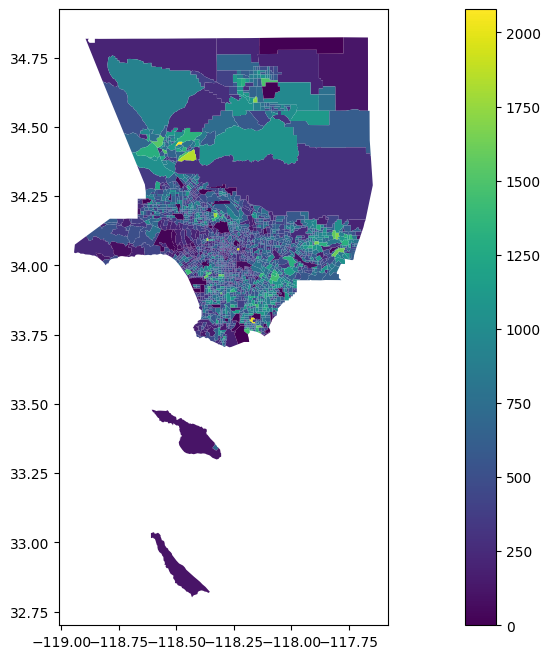

In [ ]:
merge_labor.plot(column = 'S2301_C01_034E',legend=True, figsize=(20,8))


In [ ]:
y

#join data

In [ ]:
labor.shape

(2498, 283)

In [ ]:
merge_labor_lim_eng = pd.merge(merge_labor, lim_eng_1601, left_on='GEO_ID', right_on='GEO_ID', how='left')

In [ ]:
merge_labor_lim_eng.shape

(2495, 583)

In [ ]:
merge_labor_lim_eng = merge_labor_lim_eng.replace(['-', '**','(X)'], 0)


In [ ]:
merge_labor_lim_eng.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry,...,S1601_C06_020M,S1601_C06_021E,S1601_C06_021M,S1601_C06_022E,S1601_C06_022M,S1601_C06_023E,S1601_C06_023M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2...",...,7.6,0,0,39.5,10.6,31.7,16.4,43.2,14.1,NaN
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2...",...,12.2,0,0,37.1,16.1,5.9,9.3,40.9,16.4,NaN
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2...",...,6.0,0,0,36.7,8.9,7.9,6.5,57.4,13.7,NaN
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2...",...,12.8,0,0,53.8,14.3,38.5,28.6,59.6,15.3,NaN
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2...",...,9.2,0,0,50.8,12.7,12.3,14.2,64.3,13.7,NaN


#spatial merge

# spatial regression model analysis

In [ ]:
from libpysal.examples import available
from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda

from scipy import stats
import statsmodels.formula.api as sm


In [ ]:
predictors = ['S2301_C01_035E','S2301_C01_034E']
#S2301_C01_030E:
#Estimate!!Total!!Population 20 to 64 years!!DISABILITY STATUS!!With any disability
#S2301_C01_034E
#Population 25 to 64 years!!Some college or associate's degree
#S2301_C01_035E
#Population 25 to 64 years!!Bachelor's degree or higher

In [ ]:
m1 = spreg.OLS(merge_labor_lim_eng[['S2301_C01_029E']].values, merge_labor_lim_eng[predictors].values,
                  name_y = 'S2301_C01_029E', name_x = predictors)

#S1601_C05_003E
#Estimate!!Speak English only or speak English very well"!!Percent of specified language speakers!!Population 5 years and over!!Speak a language other than English"
#S2301_C01_028E
#Estimate!!Total!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!Below poverty level

In [ ]:
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           3
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2492
R-squared           :      0.7168
Adjusted R-squared  :      0.7165
Sum squared residual: 4.96117e+08                F-statistic           :   3153.0036
Sigma-square        :  199084.067                Prob(F-statistic)     :           0
S.E. of regression  :     446.188                Log likelihood        :  -18760.100
Sigma-square ML     :  198844.687                Akaike info criterion :   37526.200
S.E of regression ML:    445.9200                Schwarz criterion     :   37543.666

----------------------------------------------------------

In [ ]:
w_ = weights.KNN.from_dataframe(merge_labor_lim_eng, k=8)
w_.transform = 'R'
w_

In [ ]:
m4 = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_029E"]].values,
    # Independent variables
    merge_labor_lim_eng[predictors].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_029E",
    # Independent variables names
    name_x=predictors,
)

In [ ]:
print(m4.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           3
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2492
Pseudo R-squared    :      0.6946
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       487.82240        32.75222        14.89433         0.00000
      S2301_C01_035E         0.76776         0.02786  